In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import pandas as pd
import numpy as np
import networkx as nx
from edge_discovery import glasso
from graph import draw_graph, Node, get_graph
from data import get_nodes, get_scaled_data

In [12]:
nodes, nodes_ids = get_nodes()
df = get_scaled_data()

In [15]:
W = glasso(df, 0.000003, 0.001)

[[0.         0.81604202 0.91927703 0.70324045 0.75312738 0.7521246
  0.81006786 0.74767661]
 [0.81604202 0.         0.77200242 0.77731625 0.8141491  0.73760256
  0.86970232 0.77828765]
 [0.91927703 0.77200242 0.         0.66865698 0.7035074  0.72369513
  0.75029628 0.70767246]
 [0.70324045 0.77731625 0.66865698 0.         0.88380011 0.70943287
  0.81422764 0.83018119]
 [0.75312738 0.8141491  0.7035074  0.88380011 0.         0.76284817
  0.86339406 0.88819183]
 [0.7521246  0.73760256 0.72369513 0.70943287 0.76284817 0.
  0.71048787 0.78676771]
 [0.81006786 0.86970232 0.75029628 0.81422764 0.86339406 0.71048787
  0.         0.82380673]
 [0.74767661 0.77828765 0.70767246 0.83018119 0.88819183 0.78676771
  0.82380673 0.        ]]


/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:132: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.18894564766650435, tolerance: 0.0003970575098448916
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:132: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8796858723586316, tolerance: 0.00041824577627057747
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:132: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2719214499345113, tolerance: 0.0004622361143342484
  coefs, _, _, _ = cd_fast.enet_coo

In [4]:
W

array([[0.        , 0.81604202, 0.91927703, 0.70324045, 0.75312738,
        0.7521246 , 0.81006786, 0.74767661],
       [0.81604202, 0.        , 0.77200242, 0.77731625, 0.8141491 ,
        0.73760256, 0.86970232, 0.77828765],
       [0.91927703, 0.77200242, 0.        , 0.66865698, 0.7035074 ,
        0.72369513, 0.75029628, 0.70767246],
       [0.70324045, 0.77731625, 0.66865698, 0.        , 0.88380011,
        0.70943287, 0.81422764, 0.83018119],
       [0.75312738, 0.8141491 , 0.7035074 , 0.88380011, 0.        ,
        0.76284817, 0.86339406, 0.88819183],
       [0.7521246 , 0.73760256, 0.72369513, 0.70943287, 0.76284817,
        0.        , 0.71048787, 0.78676771],
       [0.81006786, 0.86970232, 0.75029628, 0.81422764, 0.86339406,
        0.71048787, 0.        , 0.82380673],
       [0.74767661, 0.77828765, 0.70767246, 0.83018119, 0.88819183,
        0.78676771, 0.82380673, 0.        ]])

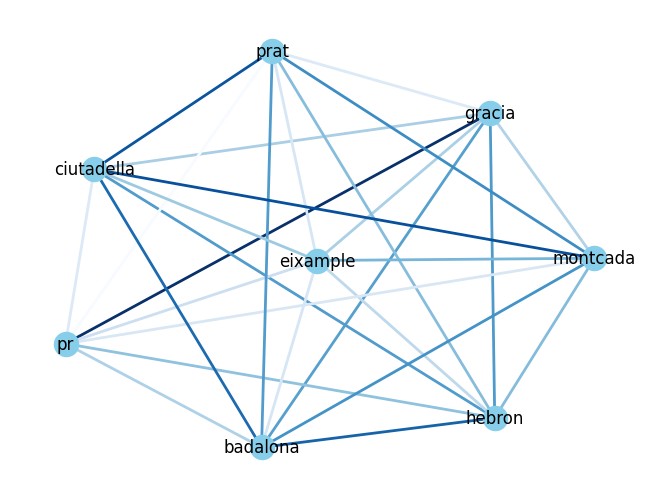

In [6]:
G = get_graph(W, nodes_ids)
draw_graph(G)

Index(['gracia', 'pr', 'eixample', 'prat', 'montcada', 'ciutadella', 'hebron',
       'badalona'],
      dtype='object')
[[1.         0.81598117 0.91917952 0.70333811 0.75303164 0.75205001
  0.8099736  0.74757813]
 [0.81598117 1.         0.7719049  0.77721932 0.81405426 0.73753514
  0.86960891 0.77838308]
 [0.91917952 0.7719049  1.         0.66855962 0.70360595 0.72361446
  0.75039485 0.70757482]
 [0.70333811 0.77721932 0.66855962 1.         0.88370479 0.7093534
  0.8141329  0.83008404]
 [0.75303164 0.81405426 0.70360595 0.88370479 1.         0.76276127
  0.86329793 0.8880953 ]
 [0.75205001 0.73753514 0.72361446 0.7093534  0.76276127 1.
  0.71058505 0.7866712 ]
 [0.8099736  0.86960891 0.75039485 0.8141329  0.86329793 0.71058505
  1.         0.82370973]
 [0.74757813 0.77838308 0.70757482 0.83008404 0.8880953  0.7866712
  0.82370973 1.        ]] [[ 8.66090375 -0.90777259 -5.62356194  0.45279627 -0.21170619 -0.73051936
  -1.60975796 -0.07612899]
 [-0.90777259  5.23090906 -0.44557215 -0.50

/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: 1.568e-03
  warnings.warn(
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: 9.431e-04
  warnings.warn(


[[1.         0.79601138 0.89916031 0.69422672 0.73683094 0.73200826
  0.78995983 0.72758385]
 [0.79601138 1.         0.75191397 0.75724632 0.79405507 0.71749527
  0.84959786 0.75818333]
 [0.89916031 0.75191397 1.         0.65399254 0.69436915 0.7035945
  0.73766756 0.68757812]
 [0.69422672 0.75724632 0.65399254 1.         0.86371134 0.68933322
  0.79412326 0.81008261]
 [0.73683094 0.79405507 0.69436915 0.86371134 1.         0.74275218
  0.84329619 0.86809372]
 [0.73200826 0.71749527 0.7035945  0.68933322 0.74275218 1.
  0.7209093  0.76667133]
 [0.78995983 0.84959786 0.73766756 0.79412326 0.84329619 0.7209093
  1.         0.80370973]
 [0.72758385 0.75818333 0.68757812 0.81008261 0.86809372 0.76667133
  0.80370973 1.        ]] [[ 6.79010040e+00 -8.97668933e-01 -4.23504581e+00 -0.00000000e+00
  -0.00000000e+00 -5.15968114e-01 -9.59728546e-01 -1.80701064e-01]
 [-8.97668933e-01  4.54295402e+00 -3.63364722e-01 -4.39813511e-01
  -4.62536603e-01 -3.21670113e-01 -1.90906956e+00 -2.25222761e-03]

/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: 2.009e-03
  warnings.warn(
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: 1.012e-03
  warnings.warn(


[[1.         0.77600623 0.87916093 0.67115188 0.71361461 0.71201206
  0.7699597  0.70758178]
 [0.77600623 1.         0.73191047 0.73724399 0.77405236 0.69749698
  0.82959755 0.73818338]
 [0.87916093 0.73191047 1.         0.63027199 0.67036268 0.68359364
  0.71365337 0.66757601]
 [0.67115188 0.73724399 0.63027199 1.         0.84370926 0.66933279
  0.77412392 0.79008325]
 [0.71361461 0.77405236 0.67036268 0.84370926 1.         0.72275131
  0.82329548 0.84809425]
 [0.71201206 0.69749698 0.68359364 0.66933279 0.72275131 1.
  0.69808361 0.74667067]
 [0.7699597  0.82959755 0.71365337 0.77412392 0.82329548 0.69808361
  1.         0.78370973]
 [0.70758178 0.73818338 0.66757601 0.79008325 0.84809425 0.74667067
  0.78370973 1.        ]] [[ 5.71942066 -0.76059611 -3.4100942  -0.         -0.         -0.47212985
  -0.8765866  -0.16919038]
 [-0.76059611  4.09884748 -0.39626089 -0.41089036 -0.44635308 -0.29856679
  -1.61101497 -0.03394131]
 [-3.4100942  -0.39626089  4.60440528 -0.         -0.        

/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -6.150e-04
  warnings.warn(
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -4.429e-04
  warnings.warn(


[[1.         0.74592401 0.84913908 0.6393558  0.68304817 0.68204944
  0.73999734 0.67757637]
 [0.74592401 1.         0.70186961 0.70717271 0.74405387 0.66752229
  0.79962259 0.70818724]
 [0.84913908 0.70186961 1.         0.5985231  0.63839905 0.65360199
  0.68020061 0.63757755]
 [0.6393558  0.70717271 0.5985231  1.         0.81369613 0.63933915
  0.74413648 0.76008752]
 [0.68304817 0.74405387 0.63839905 0.81369613 1.         0.69275052
  0.79329717 0.81809594]
 [0.68204944 0.66752229 0.65360199 0.63933915 0.69275052 1.
  0.66373404 0.71667091]
 [0.73999734 0.79962259 0.68020061 0.74413648 0.79329717 0.66373404
  1.         0.75370973]
 [0.67757637 0.70818724 0.63757755 0.76008752 0.81809594 0.71667091
  0.75370973 1.        ]] [[ 4.63690731 -0.62806837 -2.59898552 -0.         -0.04688494 -0.41832666
  -0.73470715 -0.14790753]
 [-0.62806837  3.57515015 -0.38882776 -0.36942852 -0.40244795 -0.27554899
  -1.29757052 -0.07310187]
 [-2.59898552 -0.38882776  3.80590275 -0.0134317  -0.        

/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -6.722e-04
  warnings.warn(
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -5.193e-04
  warnings.warn(


[[1.         0.72593172 0.82914633 0.61844236 0.66304982 0.66204793
  0.71998732 0.65757584]
 [0.72593172 1.         0.6818781  0.68717856 0.72405514 0.64752053
  0.77962015 0.68818732]
 [0.82914633 0.6818781  1.         0.57852768 0.61789825 0.63360162
  0.6601984  0.61757782]
 [0.61844236 0.68717856 0.57852768 1.         0.79369864 0.61933891
  0.72413621 0.74008755]
 [0.66304982 0.72405514 0.61789825 0.79369864 1.         0.67275148
  0.77329868 0.79809579]
 [0.66204793 0.64752053 0.63360162 0.61933891 0.67275148 1.
  0.64108563 0.69667081]
 [0.71998732 0.77962015 0.6601984  0.72413621 0.77329868 0.64108563
  1.         0.73370973]
 [0.65757584 0.68818732 0.61757782 0.74008755 0.79809579 0.69667081
  0.73370973 1.        ]] [[ 4.12052812 -0.57136858 -2.22266208 -0.         -0.06972709 -0.38921161
  -0.64499599 -0.14348525]
 [-0.57136858  3.29545278 -0.36589413 -0.34566806 -0.37603617 -0.26246851
  -1.14043294 -0.0908786 ]
 [-2.22266208 -0.36589413  3.42632366 -0.02358435 -0.        

/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -6.867e-04
  warnings.warn(
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -6.841e-04
  warnings.warn(


[[1.         0.70593088 0.80916307 0.59744275 0.6430489  0.64204392
  0.70000995 0.63757862]
 [0.70593088 1.         0.66188598 0.66717811 0.70405573 0.62751805
  0.75962292 0.66818786]
 [0.80916307 0.66188598 1.         0.55853089 0.59723835 0.61360118
  0.6402018  0.59757757]
 [0.59744275 0.66717811 0.55853089 1.         0.77369962 0.59933862
  0.7041358  0.7200872 ]
 [0.6430489  0.70405573 0.59723835 0.77369962 1.         0.65275133
  0.75329745 0.77809548]
 [0.64204392 0.62751805 0.61360118 0.59933862 0.65275133 1.
  0.61848977 0.6766708 ]
 [0.70000995 0.75962292 0.6402018  0.7041358  0.75329745 0.61848977
  1.         0.71370973]
 [0.63757862 0.66818786 0.59757757 0.7200872  0.77809548 0.6766708
  0.71370973 1.        ]] [[ 3.71348484 -0.52354238 -1.93190445 -0.         -0.08588642 -0.36376332
  -0.57586871 -0.13951061]
 [-0.52354238  3.05823715 -0.34494934 -0.32449689 -0.35267551 -0.25026413
  -1.01361505 -0.10290628]
 [-1.93190445 -0.34494934  3.12371161 -0.03194111 -0.         

/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: 4.082e-04
  warnings.warn(
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: 1.486e-04
  warnings.warn(


[[1.         0.63596383 0.73917999 0.52347672 0.57302562 0.57201655
  0.6299626  0.56758028]
 [0.63596383 1.         0.59191215 0.59722564 0.63405132 0.55750034
  0.68959981 0.59818341]
 [0.73917999 0.59191215 1.         0.48856565 0.52403259 0.54359581
  0.57019108 0.52757497]
 [0.52347672 0.59722564 0.48856565 1.         0.70370448 0.52933556
  0.63412949 0.65008354]
 [0.57302562 0.63405132 0.52403259 0.70370448 1.         0.58275118
  0.68329684 0.70809484]
 [0.57201655 0.55750034 0.54359581 0.52933556 0.58275118 1.
  0.53979804 0.60667085]
 [0.6299626  0.68959981 0.57019108 0.63412949 0.68329684 0.53979804
  1.         0.64370973]
 [0.56758028 0.59818341 0.52757497 0.65008354 0.70809484 0.60667085
  0.64370973 1.        ]] [[ 2.78002508 -0.40264283 -1.29101899 -0.         -0.11266735 -0.29453588
  -0.41951282 -0.12737841]
 [-0.40264283  2.45042654 -0.28429741 -0.26594643 -0.28842212 -0.213072
  -0.71609706 -0.11990402]
 [-1.29101899 -0.28429741  2.41467367 -0.04982161 -0.         -

/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: 1.568e-03
  warnings.warn(
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: 9.431e-04
  warnings.warn(


[[1.         0.80597846 0.90915525 0.70638462 0.74920385 0.74202732
  0.79995765 0.73758119]
 [0.80597846 1.         0.76189977 0.7672178  0.80405469 0.72750587
  0.85959986 0.77002916]
 [0.90915525 0.76189977 1.         0.66628479 0.70691457 0.71359752
  0.74876963 0.69757727]
 [0.70638462 0.7672178  0.66628479 1.         0.87370345 0.69933595
  0.80412898 0.82008561]
 [0.74920385 0.80405469 0.70691457 0.87370345 1.         0.7527512
  0.85329618 0.87809577]
 [0.74202732 0.72750587 0.71359752 0.69933595 0.7527512  1.
  0.72058361 0.77667146]
 [0.79995765 0.85959986 0.74876963 0.80412898 0.85329618 0.72058361
  1.         0.81370973]
 [0.73758119 0.77002916 0.69757727 0.82008561 0.87809577 0.77667146
  0.81370973 1.        ]] [[ 7.52754945 -0.95763755 -4.79566371  0.         -0.         -0.58195068
  -1.06606267 -0.14911779]
 [-0.95763755  4.82559653 -0.33270139 -0.44475605 -0.42362567 -0.40205039
  -2.12352609 -0.        ]
 [-4.79566371 -0.33270139  5.91698955 -0.          0.         

/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: 2.009e-03
  warnings.warn(
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: 1.012e-03
  warnings.warn(


[[1.         0.78597776 0.88915656 0.68268876 0.72522951 0.72200686
  0.77994085 0.71758085]
 [0.78597776 1.         0.74190154 0.74724311 0.78405317 0.70749533
  0.83959183 0.7481804 ]
 [0.88915656 0.74190154 1.         0.64213922 0.68237886 0.69359052
  0.72566796 0.6775764 ]
 [0.68268876 0.74724311 0.64213922 1.         0.85370877 0.67933137
  0.78412358 0.80008277]
 [0.72522951 0.78405317 0.68237886 0.85370877 1.         0.73275173
  0.83329649 0.85809535]
 [0.72200686 0.70749533 0.69359052 0.67933137 0.73275173 1.
  0.70949285 0.75667187]
 [0.77994085 0.83959183 0.72566796 0.78412358 0.83329649 0.70949285
  1.         0.79370973]
 [0.71758085 0.7481804  0.6775764  0.80008277 0.85809535 0.75667187
  0.79370973 1.        ]] [[ 6.20611619 -0.82224224 -3.78241639 -0.         -0.         -0.49287101
  -0.91637378 -0.17413986]
 [-0.82224224  4.30827712 -0.38393372 -0.42468406 -0.45511552 -0.30975775
  -1.74899381 -0.01970105]
 [-3.78241639 -0.38393372  4.96377201 -0.         -0.        

/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -6.150e-04
  warnings.warn(
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -4.429e-04
  warnings.warn(


[[1.         0.75592282 0.85913909 0.64977934 0.69304769 0.69205018
  0.74998949 0.68757545]
 [0.75592282 1.         0.71186867 0.71717441 0.75405413 0.67752278
  0.8096225  0.71818711]
 [0.85913909 0.71186867 1.         0.60852241 0.64858044 0.66360238
  0.69019882 0.64757751]
 [0.64977934 0.71717441 0.60852241 1.         0.82369648 0.64933955
  0.754137   0.77008743]
 [0.69304769 0.75405413 0.64858044 0.82369648 1.         0.70275074
  0.80329856 0.82809592]
 [0.69205018 0.67752278 0.66360238 0.64933955 0.70275074 1.
  0.67507127 0.7266708 ]
 [0.74998949 0.8096225  0.69019882 0.754137   0.80329856 0.67507127
  1.         0.76370973]
 [0.68757545 0.71818711 0.64757751 0.77008743 0.82809592 0.7266708
  0.76370973 1.        ]] [[ 4.95097885 -0.66061501 -2.83134516 -0.         -0.03201789 -0.43457678
  -0.78993678 -0.15034174]
 [-0.66061501  3.73489892 -0.40111432 -0.38254974 -0.4169528  -0.28243822
  -1.3909156  -0.06124752]
 [-2.83134516 -0.40111432  4.03481671 -0.00766613 -0.         

/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -6.722e-04
  warnings.warn(
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -5.193e-04
  warnings.warn(


[[1.         0.73592506 0.83913851 0.6289091  0.67304793 0.67204882
  0.73000403 0.66757684]
 [0.73592506 1.         0.69186993 0.69717661 0.73405589 0.65752217
  0.78962457 0.69818752]
 [0.83913851 0.69186993 1.         0.58852409 0.62816855 0.6436021
  0.67020158 0.62757789]
 [0.6289091  0.69717661 0.58852409 1.         0.80369849 0.62933899
  0.73413577 0.7500877 ]
 [0.67304793 0.73405589 0.62816855 0.80369849 1.         0.68275098
  0.78329683 0.80809573]
 [0.67204882 0.65752217 0.6436021  0.62933899 0.68275098 1.
  0.65240743 0.7066708 ]
 [0.73000403 0.78962457 0.67020158 0.73413577 0.78329683 0.65240743
  1.         0.74370973]
 [0.66757684 0.69818752 0.62757789 0.7500877  0.80809573 0.7066708
  0.74370973 1.        ]] [[ 4.36223999 -0.59843033 -2.39791898 -0.         -0.05928706 -0.40325156
  -0.68697682 -0.14562588]
 [-0.59843033  3.42927439 -0.37709289 -0.35717772 -0.3888438  -0.26890137
  -1.21461898 -0.08284418]
 [-2.39791898 -0.37709289  3.60456268 -0.01874909 -0.         -

/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -6.867e-04
  warnings.warn(
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -6.841e-04
  warnings.warn(


[[1.         0.71593101 0.81915341 0.60795223 0.65304971 0.65204657
  0.70999115 0.64757637]
 [0.71593101 1.         0.67188094 0.67717739 0.71405548 0.63751971
  0.76962276 0.67818725]
 [0.81915341 0.67188094 1.         0.56852886 0.60758566 0.62360157
  0.65019897 0.60757767]
 [0.60795223 0.67717739 0.56852886 1.         0.78369894 0.60933899
  0.71413706 0.73008739]
 [0.65304971 0.71405548 0.60758566 0.78369894 1.         0.66275134
  0.76329916 0.7880958 ]
 [0.65204657 0.63751971 0.62360157 0.60933899 0.66275134 1.
  0.62978102 0.68667088]
 [0.70999115 0.76962276 0.65019897 0.71413706 0.76329916 0.62978102
  1.         0.72370973]
 [0.64757637 0.67818725 0.60757767 0.73008739 0.7880958  0.68667088
  0.72370973 1.        ]] [[ 3.90563    -0.54647373 -2.06845365 -0.         -0.07850044 -0.37608199
  -0.60828867 -0.14145208]
 [-0.54647373  3.17216498 -0.35519016 -0.33476961 -0.36401728 -0.25626678
  -1.07381622 -0.09748466]
 [-2.06845365 -0.35519016  3.26697464 -0.02798217 -0.        

/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: 4.082e-04
  warnings.warn(
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: 1.486e-04
  warnings.warn(


[[1.         0.66599134 0.7691867  0.55526459 0.60301773 0.60201124
  0.65995074 0.59758223]
 [0.66599134 1.         0.6219271  0.62723782 0.66405048 0.58749352
  0.7195916  0.62818185]
 [0.7691867  0.6219271  1.         0.51857769 0.55554442 0.57359341
  0.60018775 0.55757423]
 [0.55526459 0.62723782 0.51857769 1.         0.73370818 0.55933349
  0.66412764 0.68008224]
 [0.60301773 0.66405048 0.55554442 0.73370818 1.         0.6127509
  0.71329673 0.73809463]
 [0.60201124 0.58749352 0.57359341 0.55933349 0.6127509  1.
  0.57341425 0.636671  ]
 [0.65995074 0.7195916  0.60018775 0.66412764 0.71329673 0.57341425
  1.         0.67370973]
 [0.59758223 0.62818185 0.55757423 0.68008224 0.73809463 0.636671
  0.67370973 1.        ]] [[ 3.11138332 -0.44775724 -1.51359725 -0.         -0.10510481 -0.32104492
  -0.47431282 -0.13249886]
 [-0.44775724  2.67725102 -0.30803897 -0.28875921 -0.31302793 -0.22796383
  -0.82218954 -0.11588601]
 [-1.51359725 -0.30803897  2.66917995 -0.04408274 -0.         -0

/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: 1.568e-03
  warnings.warn(
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: 9.431e-04
  warnings.warn(


[[1.         0.80597846 0.90915525 0.70638462 0.74920385 0.74202732
  0.79995765 0.73758119]
 [0.80597846 1.         0.76189977 0.7672178  0.80405469 0.72750587
  0.85959986 0.77002916]
 [0.90915525 0.76189977 1.         0.66628479 0.70691457 0.71359752
  0.74876963 0.69757727]
 [0.70638462 0.7672178  0.66628479 1.         0.87370345 0.69933595
  0.80412898 0.82008561]
 [0.74920385 0.80405469 0.70691457 0.87370345 1.         0.7527512
  0.85329618 0.87809577]
 [0.74202732 0.72750587 0.71359752 0.69933595 0.7527512  1.
  0.72058361 0.77667146]
 [0.79995765 0.85959986 0.74876963 0.80412898 0.85329618 0.72058361
  1.         0.81370973]
 [0.73758119 0.77002916 0.69757727 0.82008561 0.87809577 0.77667146
  0.81370973 1.        ]] [[ 7.52754945 -0.95763755 -4.79566371  0.         -0.         -0.58195068
  -1.06606267 -0.14911779]
 [-0.95763755  4.82559653 -0.33270139 -0.44475605 -0.42362567 -0.40205039
  -2.12352609 -0.        ]
 [-4.79566371 -0.33270139  5.91698955 -0.          0.         

/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: 2.009e-03
  warnings.warn(
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: 1.012e-03
  warnings.warn(


[[1.         0.78597776 0.88915656 0.68268876 0.72522951 0.72200686
  0.77994085 0.71758085]
 [0.78597776 1.         0.74190154 0.74724311 0.78405317 0.70749533
  0.83959183 0.7481804 ]
 [0.88915656 0.74190154 1.         0.64213922 0.68237886 0.69359052
  0.72566796 0.6775764 ]
 [0.68268876 0.74724311 0.64213922 1.         0.85370877 0.67933137
  0.78412358 0.80008277]
 [0.72522951 0.78405317 0.68237886 0.85370877 1.         0.73275173
  0.83329649 0.85809535]
 [0.72200686 0.70749533 0.69359052 0.67933137 0.73275173 1.
  0.70949285 0.75667187]
 [0.77994085 0.83959183 0.72566796 0.78412358 0.83329649 0.70949285
  1.         0.79370973]
 [0.71758085 0.7481804  0.6775764  0.80008277 0.85809535 0.75667187
  0.79370973 1.        ]] [[ 6.20611619 -0.82224224 -3.78241639 -0.         -0.         -0.49287101
  -0.91637378 -0.17413986]
 [-0.82224224  4.30827712 -0.38393372 -0.42468406 -0.45511552 -0.30975775
  -1.74899381 -0.01970105]
 [-3.78241639 -0.38393372  4.96377201 -0.         -0.        

/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -6.150e-04
  warnings.warn(
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -4.429e-04
  warnings.warn(


[[1.         0.75592282 0.85913909 0.64977934 0.69304769 0.69205018
  0.74998949 0.68757545]
 [0.75592282 1.         0.71186867 0.71717441 0.75405413 0.67752278
  0.8096225  0.71818711]
 [0.85913909 0.71186867 1.         0.60852241 0.64858044 0.66360238
  0.69019882 0.64757751]
 [0.64977934 0.71717441 0.60852241 1.         0.82369648 0.64933955
  0.754137   0.77008743]
 [0.69304769 0.75405413 0.64858044 0.82369648 1.         0.70275074
  0.80329856 0.82809592]
 [0.69205018 0.67752278 0.66360238 0.64933955 0.70275074 1.
  0.67507127 0.7266708 ]
 [0.74998949 0.8096225  0.69019882 0.754137   0.80329856 0.67507127
  1.         0.76370973]
 [0.68757545 0.71818711 0.64757751 0.77008743 0.82809592 0.7266708
  0.76370973 1.        ]] [[ 4.95097885 -0.66061501 -2.83134516 -0.         -0.03201789 -0.43457678
  -0.78993678 -0.15034174]
 [-0.66061501  3.73489892 -0.40111432 -0.38254974 -0.4169528  -0.28243822
  -1.3909156  -0.06124752]
 [-2.83134516 -0.40111432  4.03481671 -0.00766613 -0.         

/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -6.722e-04
  warnings.warn(
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -5.193e-04
  warnings.warn(


[[1.         0.73592506 0.83913851 0.6289091  0.67304793 0.67204882
  0.73000403 0.66757684]
 [0.73592506 1.         0.69186993 0.69717661 0.73405589 0.65752217
  0.78962457 0.69818752]
 [0.83913851 0.69186993 1.         0.58852409 0.62816855 0.6436021
  0.67020158 0.62757789]
 [0.6289091  0.69717661 0.58852409 1.         0.80369849 0.62933899
  0.73413577 0.7500877 ]
 [0.67304793 0.73405589 0.62816855 0.80369849 1.         0.68275098
  0.78329683 0.80809573]
 [0.67204882 0.65752217 0.6436021  0.62933899 0.68275098 1.
  0.65240743 0.7066708 ]
 [0.73000403 0.78962457 0.67020158 0.73413577 0.78329683 0.65240743
  1.         0.74370973]
 [0.66757684 0.69818752 0.62757789 0.7500877  0.80809573 0.7066708
  0.74370973 1.        ]] [[ 4.36223999 -0.59843033 -2.39791898 -0.         -0.05928706 -0.40325156
  -0.68697682 -0.14562588]
 [-0.59843033  3.42927439 -0.37709289 -0.35717772 -0.3888438  -0.26890137
  -1.21461898 -0.08284418]
 [-2.39791898 -0.37709289  3.60456268 -0.01874909 -0.         -

/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -6.867e-04
  warnings.warn(
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -6.841e-04
  warnings.warn(


[[1.         0.71593101 0.81915341 0.60795223 0.65304971 0.65204657
  0.70999115 0.64757637]
 [0.71593101 1.         0.67188094 0.67717739 0.71405548 0.63751971
  0.76962276 0.67818725]
 [0.81915341 0.67188094 1.         0.56852886 0.60758566 0.62360157
  0.65019897 0.60757767]
 [0.60795223 0.67717739 0.56852886 1.         0.78369894 0.60933899
  0.71413706 0.73008739]
 [0.65304971 0.71405548 0.60758566 0.78369894 1.         0.66275134
  0.76329916 0.7880958 ]
 [0.65204657 0.63751971 0.62360157 0.60933899 0.66275134 1.
  0.62978102 0.68667088]
 [0.70999115 0.76962276 0.65019897 0.71413706 0.76329916 0.62978102
  1.         0.72370973]
 [0.64757637 0.67818725 0.60757767 0.73008739 0.7880958  0.68667088
  0.72370973 1.        ]] [[ 3.90563    -0.54647373 -2.06845365 -0.         -0.07850044 -0.37608199
  -0.60828867 -0.14145208]
 [-0.54647373  3.17216498 -0.35519016 -0.33476961 -0.36401728 -0.25626678
  -1.07381622 -0.09748466]
 [-2.06845365 -0.35519016  3.26697464 -0.02798217 -0.        

/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: 4.082e-04
  warnings.warn(
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: 1.486e-04
  warnings.warn(


[[1.         0.66599134 0.7691867  0.55526459 0.60301773 0.60201124
  0.65995074 0.59758223]
 [0.66599134 1.         0.6219271  0.62723782 0.66405048 0.58749352
  0.7195916  0.62818185]
 [0.7691867  0.6219271  1.         0.51857769 0.55554442 0.57359341
  0.60018775 0.55757423]
 [0.55526459 0.62723782 0.51857769 1.         0.73370818 0.55933349
  0.66412764 0.68008224]
 [0.60301773 0.66405048 0.55554442 0.73370818 1.         0.6127509
  0.71329673 0.73809463]
 [0.60201124 0.58749352 0.57359341 0.55933349 0.6127509  1.
  0.57341425 0.636671  ]
 [0.65995074 0.7195916  0.60018775 0.66412764 0.71329673 0.57341425
  1.         0.67370973]
 [0.59758223 0.62818185 0.55757423 0.68008224 0.73809463 0.636671
  0.67370973 1.        ]] [[ 3.11138332 -0.44775724 -1.51359725 -0.         -0.10510481 -0.32104492
  -0.47431282 -0.13249886]
 [-0.44775724  2.67725102 -0.30803897 -0.28875921 -0.31302793 -0.22796383
  -0.82218954 -0.11588601]
 [-1.51359725 -0.30803897  2.66917995 -0.04408274 -0.         -0

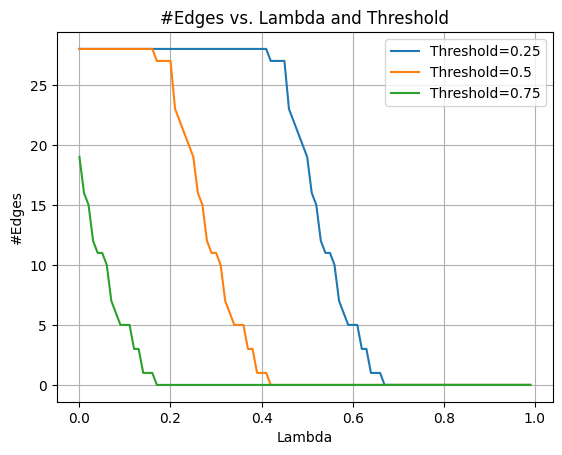

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from graph import draw_graph_in_map
import pandas as pd
import geopandas as gpd
from graph import draw_graph, Node, get_graph, get_edges_from_adjacency_matrix
from edge_discovery import euclidean_distance
from data import get_nodes
from shapely.geometry import Point

thresholds = [0.25, 0.5, 0.75]
alpha_vals = np.arange(0.0001, 1, 0.01)

# Plotting
for i, threshold in enumerate(thresholds):
    num_edges = []
    for alpha_val in alpha_vals:
        W = glasso(df, alpha_val, threshold)
        num_edges.append(np.sum(W > 0) // 2)  # Since it's an undirected graph, divide by 2            
    plt.plot(alpha_vals, num_edges, label=f'Threshold={threshold}')

plt.xlabel('Lambda')
plt.ylabel('#Edges')
plt.title('#Edges vs. Lambda and Threshold')
plt.legend()
plt.grid(True)
plt.savefig('fig/num_edges_glasso.png')
plt.show()


Index(['gracia', 'pr', 'eixample', 'prat', 'montcada', 'ciutadella', 'hebron',
       'badalona'],
      dtype='object')
[[1.         0.81598117 0.91917952 0.70333811 0.75303164 0.75205001
  0.8099736  0.74757813]
 [0.81598117 1.         0.7719049  0.77721932 0.81405426 0.73753514
  0.86960891 0.77838308]
 [0.91917952 0.7719049  1.         0.66855962 0.70360595 0.72361446
  0.75039485 0.70757482]
 [0.70333811 0.77721932 0.66855962 1.         0.88370479 0.7093534
  0.8141329  0.83008404]
 [0.75303164 0.81405426 0.70360595 0.88370479 1.         0.76276127
  0.86329793 0.8880953 ]
 [0.75205001 0.73753514 0.72361446 0.7093534  0.76276127 1.
  0.71058505 0.7866712 ]
 [0.8099736  0.86960891 0.75039485 0.8141329  0.86329793 0.71058505
  1.         0.82370973]
 [0.74757813 0.77838308 0.70757482 0.83008404 0.8880953  0.7866712
  0.82370973 1.        ]] [[ 8.66090375 -0.90777259 -5.62356194  0.45279627 -0.21170619 -0.73051936
  -1.60975796 -0.07612899]
 [-0.90777259  5.23090906 -0.44557215 -0.50

/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: 1.568e-03
  warnings.warn(
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: 9.431e-04
  warnings.warn(


[[1.         0.79601138 0.89916031 0.69422672 0.73683094 0.73200826
  0.78995983 0.72758385]
 [0.79601138 1.         0.75191397 0.75724632 0.79405507 0.71749527
  0.84959786 0.75818333]
 [0.89916031 0.75191397 1.         0.65399254 0.69436915 0.7035945
  0.73766756 0.68757812]
 [0.69422672 0.75724632 0.65399254 1.         0.86371134 0.68933322
  0.79412326 0.81008261]
 [0.73683094 0.79405507 0.69436915 0.86371134 1.         0.74275218
  0.84329619 0.86809372]
 [0.73200826 0.71749527 0.7035945  0.68933322 0.74275218 1.
  0.7209093  0.76667133]
 [0.78995983 0.84959786 0.73766756 0.79412326 0.84329619 0.7209093
  1.         0.80370973]
 [0.72758385 0.75818333 0.68757812 0.81008261 0.86809372 0.76667133
  0.80370973 1.        ]] [[ 6.79010040e+00 -8.97668933e-01 -4.23504581e+00 -0.00000000e+00
  -0.00000000e+00 -5.15968114e-01 -9.59728546e-01 -1.80701064e-01]
 [-8.97668933e-01  4.54295402e+00 -3.63364722e-01 -4.39813511e-01
  -4.62536603e-01 -3.21670113e-01 -1.90906956e+00 -2.25222761e-03]

/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: 2.009e-03
  warnings.warn(
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: 1.012e-03
  warnings.warn(


[[1.         0.77600623 0.87916093 0.67115188 0.71361461 0.71201206
  0.7699597  0.70758178]
 [0.77600623 1.         0.73191047 0.73724399 0.77405236 0.69749698
  0.82959755 0.73818338]
 [0.87916093 0.73191047 1.         0.63027199 0.67036268 0.68359364
  0.71365337 0.66757601]
 [0.67115188 0.73724399 0.63027199 1.         0.84370926 0.66933279
  0.77412392 0.79008325]
 [0.71361461 0.77405236 0.67036268 0.84370926 1.         0.72275131
  0.82329548 0.84809425]
 [0.71201206 0.69749698 0.68359364 0.66933279 0.72275131 1.
  0.69808361 0.74667067]
 [0.7699597  0.82959755 0.71365337 0.77412392 0.82329548 0.69808361
  1.         0.78370973]
 [0.70758178 0.73818338 0.66757601 0.79008325 0.84809425 0.74667067
  0.78370973 1.        ]] [[ 5.71942066 -0.76059611 -3.4100942  -0.         -0.         -0.47212985
  -0.8765866  -0.16919038]
 [-0.76059611  4.09884748 -0.39626089 -0.41089036 -0.44635308 -0.29856679
  -1.61101497 -0.03394131]
 [-3.4100942  -0.39626089  4.60440528 -0.         -0.        

/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -6.150e-04
  warnings.warn(
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -4.429e-04
  warnings.warn(


[[1.         0.74592401 0.84913908 0.6393558  0.68304817 0.68204944
  0.73999734 0.67757637]
 [0.74592401 1.         0.70186961 0.70717271 0.74405387 0.66752229
  0.79962259 0.70818724]
 [0.84913908 0.70186961 1.         0.5985231  0.63839905 0.65360199
  0.68020061 0.63757755]
 [0.6393558  0.70717271 0.5985231  1.         0.81369613 0.63933915
  0.74413648 0.76008752]
 [0.68304817 0.74405387 0.63839905 0.81369613 1.         0.69275052
  0.79329717 0.81809594]
 [0.68204944 0.66752229 0.65360199 0.63933915 0.69275052 1.
  0.66373404 0.71667091]
 [0.73999734 0.79962259 0.68020061 0.74413648 0.79329717 0.66373404
  1.         0.75370973]
 [0.67757637 0.70818724 0.63757755 0.76008752 0.81809594 0.71667091
  0.75370973 1.        ]] [[ 4.63690731 -0.62806837 -2.59898552 -0.         -0.04688494 -0.41832666
  -0.73470715 -0.14790753]
 [-0.62806837  3.57515015 -0.38882776 -0.36942852 -0.40244795 -0.27554899
  -1.29757052 -0.07310187]
 [-2.59898552 -0.38882776  3.80590275 -0.0134317  -0.        

/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -6.722e-04
  warnings.warn(
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -5.193e-04
  warnings.warn(


[[1.         0.72593172 0.82914633 0.61844236 0.66304982 0.66204793
  0.71998732 0.65757584]
 [0.72593172 1.         0.6818781  0.68717856 0.72405514 0.64752053
  0.77962015 0.68818732]
 [0.82914633 0.6818781  1.         0.57852768 0.61789825 0.63360162
  0.6601984  0.61757782]
 [0.61844236 0.68717856 0.57852768 1.         0.79369864 0.61933891
  0.72413621 0.74008755]
 [0.66304982 0.72405514 0.61789825 0.79369864 1.         0.67275148
  0.77329868 0.79809579]
 [0.66204793 0.64752053 0.63360162 0.61933891 0.67275148 1.
  0.64108563 0.69667081]
 [0.71998732 0.77962015 0.6601984  0.72413621 0.77329868 0.64108563
  1.         0.73370973]
 [0.65757584 0.68818732 0.61757782 0.74008755 0.79809579 0.69667081
  0.73370973 1.        ]] [[ 4.12052812 -0.57136858 -2.22266208 -0.         -0.06972709 -0.38921161
  -0.64499599 -0.14348525]
 [-0.57136858  3.29545278 -0.36589413 -0.34566806 -0.37603617 -0.26246851
  -1.14043294 -0.0908786 ]
 [-2.22266208 -0.36589413  3.42632366 -0.02358435 -0.        

/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -6.867e-04
  warnings.warn(
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -6.841e-04
  warnings.warn(


[[1.         0.70593088 0.80916307 0.59744275 0.6430489  0.64204392
  0.70000995 0.63757862]
 [0.70593088 1.         0.66188598 0.66717811 0.70405573 0.62751805
  0.75962292 0.66818786]
 [0.80916307 0.66188598 1.         0.55853089 0.59723835 0.61360118
  0.6402018  0.59757757]
 [0.59744275 0.66717811 0.55853089 1.         0.77369962 0.59933862
  0.7041358  0.7200872 ]
 [0.6430489  0.70405573 0.59723835 0.77369962 1.         0.65275133
  0.75329745 0.77809548]
 [0.64204392 0.62751805 0.61360118 0.59933862 0.65275133 1.
  0.61848977 0.6766708 ]
 [0.70000995 0.75962292 0.6402018  0.7041358  0.75329745 0.61848977
  1.         0.71370973]
 [0.63757862 0.66818786 0.59757757 0.7200872  0.77809548 0.6766708
  0.71370973 1.        ]] [[ 3.71348484 -0.52354238 -1.93190445 -0.         -0.08588642 -0.36376332
  -0.57586871 -0.13951061]
 [-0.52354238  3.05823715 -0.34494934 -0.32449689 -0.35267551 -0.25026413
  -1.01361505 -0.10290628]
 [-1.93190445 -0.34494934  3.12371161 -0.03194111 -0.         

/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: 4.082e-04
  warnings.warn(
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: 1.486e-04
  warnings.warn(


[[1.         0.63596383 0.73917999 0.52347672 0.57302562 0.57201655
  0.6299626  0.56758028]
 [0.63596383 1.         0.59191215 0.59722564 0.63405132 0.55750034
  0.68959981 0.59818341]
 [0.73917999 0.59191215 1.         0.48856565 0.52403259 0.54359581
  0.57019108 0.52757497]
 [0.52347672 0.59722564 0.48856565 1.         0.70370448 0.52933556
  0.63412949 0.65008354]
 [0.57302562 0.63405132 0.52403259 0.70370448 1.         0.58275118
  0.68329684 0.70809484]
 [0.57201655 0.55750034 0.54359581 0.52933556 0.58275118 1.
  0.53979804 0.60667085]
 [0.6299626  0.68959981 0.57019108 0.63412949 0.68329684 0.53979804
  1.         0.64370973]
 [0.56758028 0.59818341 0.52757497 0.65008354 0.70809484 0.60667085
  0.64370973 1.        ]] [[ 2.78002508 -0.40264283 -1.29101899 -0.         -0.11266735 -0.29453588
  -0.41951282 -0.12737841]
 [-0.40264283  2.45042654 -0.28429741 -0.26594643 -0.28842212 -0.213072
  -0.71609706 -0.11990402]
 [-1.29101899 -0.28429741  2.41467367 -0.04982161 -0.         -

/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/test_a

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]] [[ 1. -0. -0. -0. -0. -0. -0. -0.]
 [-0.  1. -0. -0. -0. -0. -0. -0.]
 [-0. -0.  1. -0. -0. -0. -0. -0.]
 [-0. -0. -0.  1. -0. -0. -0. -0.]
 [-0. -0. -0. -0.  1. -0. -0. -0.]
 [-0. -0. -0. -0. -0.  1. -0. -0.]
 [-0. -0. -0. -0. -0. -0.  1. -0.]
 [-0. -0. -0. -0. -0. -0. -0.  1.]]
Index(['gracia', 'pr', 'eixample', 'prat', 'montcada', 'ciutadella', 'hebron',
       'badalona'],
      dtype='object')
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]] [[ 1. -0. -0. -0. -0. -0. -0. -0.]
 [-0.  1. -0. -0. -0. -0. -0. -0.]
 [-0. -0.  1. -0. -0. -0. -0. -0.]
 [-0. -0. -0.  1. -0. -0. -0. -0.]
 [-0. -0. -0. -0.  1. -0

/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/test_a

[[1.         0.79601138 0.89916031 0.69422672 0.73683094 0.73200826
  0.78995983 0.72758385]
 [0.79601138 1.         0.75191397 0.75724632 0.79405507 0.71749527
  0.84959786 0.75818333]
 [0.89916031 0.75191397 1.         0.65399254 0.69436915 0.7035945
  0.73766756 0.68757812]
 [0.69422672 0.75724632 0.65399254 1.         0.86371134 0.68933322
  0.79412326 0.81008261]
 [0.73683094 0.79405507 0.69436915 0.86371134 1.         0.74275218
  0.84329619 0.86809372]
 [0.73200826 0.71749527 0.7035945  0.68933322 0.74275218 1.
  0.7209093  0.76667133]
 [0.78995983 0.84959786 0.73766756 0.79412326 0.84329619 0.7209093
  1.         0.80370973]
 [0.72758385 0.75818333 0.68757812 0.81008261 0.86809372 0.76667133
  0.80370973 1.        ]] [[ 6.79010040e+00 -8.97668933e-01 -4.23504581e+00 -0.00000000e+00
  -0.00000000e+00 -5.15968114e-01 -9.59728546e-01 -1.80701064e-01]
 [-8.97668933e-01  4.54295402e+00 -3.63364722e-01 -4.39813511e-01
  -4.62536603e-01 -3.21670113e-01 -1.90906956e+00 -2.25222761e-03]

/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: 1.012e-03
  warnings.warn(
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -6.150e-04
  warnings.warn(


[[1.         0.77600623 0.87916093 0.67115188 0.71361461 0.71201206
  0.7699597  0.70758178]
 [0.77600623 1.         0.73191047 0.73724399 0.77405236 0.69749698
  0.82959755 0.73818338]
 [0.87916093 0.73191047 1.         0.63027199 0.67036268 0.68359364
  0.71365337 0.66757601]
 [0.67115188 0.73724399 0.63027199 1.         0.84370926 0.66933279
  0.77412392 0.79008325]
 [0.71361461 0.77405236 0.67036268 0.84370926 1.         0.72275131
  0.82329548 0.84809425]
 [0.71201206 0.69749698 0.68359364 0.66933279 0.72275131 1.
  0.69808361 0.74667067]
 [0.7699597  0.82959755 0.71365337 0.77412392 0.82329548 0.69808361
  1.         0.78370973]
 [0.70758178 0.73818338 0.66757601 0.79008325 0.84809425 0.74667067
  0.78370973 1.        ]] [[ 5.71942066 -0.76059611 -3.4100942  -0.         -0.         -0.47212985
  -0.8765866  -0.16919038]
 [-0.76059611  4.09884748 -0.39626089 -0.41089036 -0.44635308 -0.29856679
  -1.61101497 -0.03394131]
 [-3.4100942  -0.39626089  4.60440528 -0.         -0.        

/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -4.429e-04
  warnings.warn(
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -6.722e-04
  warnings.warn(


[[1.         0.74592401 0.84913908 0.6393558  0.68304817 0.68204944
  0.73999734 0.67757637]
 [0.74592401 1.         0.70186961 0.70717271 0.74405387 0.66752229
  0.79962259 0.70818724]
 [0.84913908 0.70186961 1.         0.5985231  0.63839905 0.65360199
  0.68020061 0.63757755]
 [0.6393558  0.70717271 0.5985231  1.         0.81369613 0.63933915
  0.74413648 0.76008752]
 [0.68304817 0.74405387 0.63839905 0.81369613 1.         0.69275052
  0.79329717 0.81809594]
 [0.68204944 0.66752229 0.65360199 0.63933915 0.69275052 1.
  0.66373404 0.71667091]
 [0.73999734 0.79962259 0.68020061 0.74413648 0.79329717 0.66373404
  1.         0.75370973]
 [0.67757637 0.70818724 0.63757755 0.76008752 0.81809594 0.71667091
  0.75370973 1.        ]] [[ 4.63690731 -0.62806837 -2.59898552 -0.         -0.04688494 -0.41832666
  -0.73470715 -0.14790753]
 [-0.62806837  3.57515015 -0.38882776 -0.36942852 -0.40244795 -0.27554899
  -1.29757052 -0.07310187]
 [-2.59898552 -0.38882776  3.80590275 -0.0134317  -0.        

/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -5.193e-04
  warnings.warn(
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -6.867e-04
  warnings.warn(


[[1.         0.72593172 0.82914633 0.61844236 0.66304982 0.66204793
  0.71998732 0.65757584]
 [0.72593172 1.         0.6818781  0.68717856 0.72405514 0.64752053
  0.77962015 0.68818732]
 [0.82914633 0.6818781  1.         0.57852768 0.61789825 0.63360162
  0.6601984  0.61757782]
 [0.61844236 0.68717856 0.57852768 1.         0.79369864 0.61933891
  0.72413621 0.74008755]
 [0.66304982 0.72405514 0.61789825 0.79369864 1.         0.67275148
  0.77329868 0.79809579]
 [0.66204793 0.64752053 0.63360162 0.61933891 0.67275148 1.
  0.64108563 0.69667081]
 [0.71998732 0.77962015 0.6601984  0.72413621 0.77329868 0.64108563
  1.         0.73370973]
 [0.65757584 0.68818732 0.61757782 0.74008755 0.79809579 0.69667081
  0.73370973 1.        ]] [[ 4.12052812 -0.57136858 -2.22266208 -0.         -0.06972709 -0.38921161
  -0.64499599 -0.14348525]
 [-0.57136858  3.29545278 -0.36589413 -0.34566806 -0.37603617 -0.26246851
  -1.14043294 -0.0908786 ]
 [-2.22266208 -0.36589413  3.42632366 -0.02358435 -0.        

/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -6.841e-04
  warnings.warn(
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: 4.082e-04
  warnings.warn(


[[1.         0.70593088 0.80916307 0.59744275 0.6430489  0.64204392
  0.70000995 0.63757862]
 [0.70593088 1.         0.66188598 0.66717811 0.70405573 0.62751805
  0.75962292 0.66818786]
 [0.80916307 0.66188598 1.         0.55853089 0.59723835 0.61360118
  0.6402018  0.59757757]
 [0.59744275 0.66717811 0.55853089 1.         0.77369962 0.59933862
  0.7041358  0.7200872 ]
 [0.6430489  0.70405573 0.59723835 0.77369962 1.         0.65275133
  0.75329745 0.77809548]
 [0.64204392 0.62751805 0.61360118 0.59933862 0.65275133 1.
  0.61848977 0.6766708 ]
 [0.70000995 0.75962292 0.6402018  0.7041358  0.75329745 0.61848977
  1.         0.71370973]
 [0.63757862 0.66818786 0.59757757 0.7200872  0.77809548 0.6766708
  0.71370973 1.        ]] [[ 3.71348484 -0.52354238 -1.93190445 -0.         -0.08588642 -0.36376332
  -0.57586871 -0.13951061]
 [-0.52354238  3.05823715 -0.34494934 -0.32449689 -0.35267551 -0.25026413
  -1.01361505 -0.10290628]
 [-1.93190445 -0.34494934  3.12371161 -0.03194111 -0.         

/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: 1.486e-04
  warnings.warn(
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype

[[1.         0.63596383 0.73917999 0.52347672 0.57302562 0.57201655
  0.6299626  0.56758028]
 [0.63596383 1.         0.59191215 0.59722564 0.63405132 0.55750034
  0.68959981 0.59818341]
 [0.73917999 0.59191215 1.         0.48856565 0.52403259 0.54359581
  0.57019108 0.52757497]
 [0.52347672 0.59722564 0.48856565 1.         0.70370448 0.52933556
  0.63412949 0.65008354]
 [0.57302562 0.63405132 0.52403259 0.70370448 1.         0.58275118
  0.68329684 0.70809484]
 [0.57201655 0.55750034 0.54359581 0.52933556 0.58275118 1.
  0.53979804 0.60667085]
 [0.6299626  0.68959981 0.57019108 0.63412949 0.68329684 0.53979804
  1.         0.64370973]
 [0.56758028 0.59818341 0.52757497 0.65008354 0.70809484 0.60667085
  0.64370973 1.        ]] [[ 2.78002508 -0.40264283 -1.29101899 -0.         -0.11266735 -0.29453588
  -0.41951282 -0.12737841]
 [-0.40264283  2.45042654 -0.28429741 -0.26594643 -0.28842212 -0.213072
  -0.71609706 -0.11990402]
 [-1.29101899 -0.28429741  2.41467367 -0.04982161 -0.         -

/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/test_a

[[1.         0.07594504 0.17918009 0.00717076 0.01303081 0.01202655
  0.06997091 0.00826954]
 [0.07594504 1.         0.03190543 0.03721924 0.07405213 0.0037463
  0.12960534 0.03818454]
 [0.17918009 0.03190543 1.         0.00195981 0.00367949 0.00220705
  0.01482482 0.00217292]
 [0.00717076 0.03721924 0.00195981 1.         0.14370295 0.00637097
  0.07413053 0.09008387]
 [0.01303081 0.07405213 0.00367949 0.14370295 1.         0.02275091
  0.123297   0.1480948 ]
 [0.01202655 0.0037463  0.00220705 0.00637097 0.02275091 1.
  0.00648069 0.04667069]
 [0.06997091 0.12960534 0.01482482 0.07413053 0.123297   0.00648069
  1.         0.08370973]
 [0.00826954 0.03818454 0.00217292 0.09008387 0.1480948  0.04667069
  0.08370973 1.        ]] [[ 1.04232988e+00 -6.52610995e-02 -1.83743467e-01 -0.00000000e+00
  -2.05940770e-04 -1.14801742e-02 -6.16497101e-02 -0.00000000e+00]
 [-6.52610995e-02  1.02640645e+00 -1.90208129e-02 -1.93323899e-02
  -5.49232706e-02 -0.00000000e+00 -1.18400431e-01 -1.88256142e-02

/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/test_a

[[1.         0.80597846 0.90915525 0.70638462 0.74920385 0.74202732
  0.79995765 0.73758119]
 [0.80597846 1.         0.76189977 0.7672178  0.80405469 0.72750587
  0.85959986 0.77002916]
 [0.90915525 0.76189977 1.         0.66628479 0.70691457 0.71359752
  0.74876963 0.69757727]
 [0.70638462 0.7672178  0.66628479 1.         0.87370345 0.69933595
  0.80412898 0.82008561]
 [0.74920385 0.80405469 0.70691457 0.87370345 1.         0.7527512
  0.85329618 0.87809577]
 [0.74202732 0.72750587 0.71359752 0.69933595 0.7527512  1.
  0.72058361 0.77667146]
 [0.79995765 0.85959986 0.74876963 0.80412898 0.85329618 0.72058361
  1.         0.81370973]
 [0.73758119 0.77002916 0.69757727 0.82008561 0.87809577 0.77667146
  0.81370973 1.        ]] [[ 7.52754945 -0.95763755 -4.79566371  0.         -0.         -0.58195068
  -1.06606267 -0.14911779]
 [-0.95763755  4.82559653 -0.33270139 -0.44475605 -0.42362567 -0.40205039
  -2.12352609 -0.        ]
 [-4.79566371 -0.33270139  5.91698955 -0.          0.         

/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: 2.009e-03
  warnings.warn(
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: 1.012e-03
  warnings.warn(


[[1.         0.78597776 0.88915656 0.68268876 0.72522951 0.72200686
  0.77994085 0.71758085]
 [0.78597776 1.         0.74190154 0.74724311 0.78405317 0.70749533
  0.83959183 0.7481804 ]
 [0.88915656 0.74190154 1.         0.64213922 0.68237886 0.69359052
  0.72566796 0.6775764 ]
 [0.68268876 0.74724311 0.64213922 1.         0.85370877 0.67933137
  0.78412358 0.80008277]
 [0.72522951 0.78405317 0.68237886 0.85370877 1.         0.73275173
  0.83329649 0.85809535]
 [0.72200686 0.70749533 0.69359052 0.67933137 0.73275173 1.
  0.70949285 0.75667187]
 [0.77994085 0.83959183 0.72566796 0.78412358 0.83329649 0.70949285
  1.         0.79370973]
 [0.71758085 0.7481804  0.6775764  0.80008277 0.85809535 0.75667187
  0.79370973 1.        ]] [[ 6.20611619 -0.82224224 -3.78241639 -0.         -0.         -0.49287101
  -0.91637378 -0.17413986]
 [-0.82224224  4.30827712 -0.38393372 -0.42468406 -0.45511552 -0.30975775
  -1.74899381 -0.01970105]
 [-3.78241639 -0.38393372  4.96377201 -0.         -0.        

/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -6.150e-04
  warnings.warn(
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -4.429e-04
  warnings.warn(


[[1.         0.75592282 0.85913909 0.64977934 0.69304769 0.69205018
  0.74998949 0.68757545]
 [0.75592282 1.         0.71186867 0.71717441 0.75405413 0.67752278
  0.8096225  0.71818711]
 [0.85913909 0.71186867 1.         0.60852241 0.64858044 0.66360238
  0.69019882 0.64757751]
 [0.64977934 0.71717441 0.60852241 1.         0.82369648 0.64933955
  0.754137   0.77008743]
 [0.69304769 0.75405413 0.64858044 0.82369648 1.         0.70275074
  0.80329856 0.82809592]
 [0.69205018 0.67752278 0.66360238 0.64933955 0.70275074 1.
  0.67507127 0.7266708 ]
 [0.74998949 0.8096225  0.69019882 0.754137   0.80329856 0.67507127
  1.         0.76370973]
 [0.68757545 0.71818711 0.64757751 0.77008743 0.82809592 0.7266708
  0.76370973 1.        ]] [[ 4.95097885 -0.66061501 -2.83134516 -0.         -0.03201789 -0.43457678
  -0.78993678 -0.15034174]
 [-0.66061501  3.73489892 -0.40111432 -0.38254974 -0.4169528  -0.28243822
  -1.3909156  -0.06124752]
 [-2.83134516 -0.40111432  4.03481671 -0.00766613 -0.         

/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -6.722e-04
  warnings.warn(
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -5.193e-04
  warnings.warn(


[[1.         0.73592506 0.83913851 0.6289091  0.67304793 0.67204882
  0.73000403 0.66757684]
 [0.73592506 1.         0.69186993 0.69717661 0.73405589 0.65752217
  0.78962457 0.69818752]
 [0.83913851 0.69186993 1.         0.58852409 0.62816855 0.6436021
  0.67020158 0.62757789]
 [0.6289091  0.69717661 0.58852409 1.         0.80369849 0.62933899
  0.73413577 0.7500877 ]
 [0.67304793 0.73405589 0.62816855 0.80369849 1.         0.68275098
  0.78329683 0.80809573]
 [0.67204882 0.65752217 0.6436021  0.62933899 0.68275098 1.
  0.65240743 0.7066708 ]
 [0.73000403 0.78962457 0.67020158 0.73413577 0.78329683 0.65240743
  1.         0.74370973]
 [0.66757684 0.69818752 0.62757789 0.7500877  0.80809573 0.7066708
  0.74370973 1.        ]] [[ 4.36223999 -0.59843033 -2.39791898 -0.         -0.05928706 -0.40325156
  -0.68697682 -0.14562588]
 [-0.59843033  3.42927439 -0.37709289 -0.35717772 -0.3888438  -0.26890137
  -1.21461898 -0.08284418]
 [-2.39791898 -0.37709289  3.60456268 -0.01874909 -0.         -

/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -6.867e-04
  warnings.warn(
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -6.841e-04
  warnings.warn(


[[1.         0.71593101 0.81915341 0.60795223 0.65304971 0.65204657
  0.70999115 0.64757637]
 [0.71593101 1.         0.67188094 0.67717739 0.71405548 0.63751971
  0.76962276 0.67818725]
 [0.81915341 0.67188094 1.         0.56852886 0.60758566 0.62360157
  0.65019897 0.60757767]
 [0.60795223 0.67717739 0.56852886 1.         0.78369894 0.60933899
  0.71413706 0.73008739]
 [0.65304971 0.71405548 0.60758566 0.78369894 1.         0.66275134
  0.76329916 0.7880958 ]
 [0.65204657 0.63751971 0.62360157 0.60933899 0.66275134 1.
  0.62978102 0.68667088]
 [0.70999115 0.76962276 0.65019897 0.71413706 0.76329916 0.62978102
  1.         0.72370973]
 [0.64757637 0.67818725 0.60757767 0.73008739 0.7880958  0.68667088
  0.72370973 1.        ]] [[ 3.90563    -0.54647373 -2.06845365 -0.         -0.07850044 -0.37608199
  -0.60828867 -0.14145208]
 [-0.54647373  3.17216498 -0.35519016 -0.33476961 -0.36401728 -0.25626678
  -1.07381622 -0.09748466]
 [-2.06845365 -0.35519016  3.26697464 -0.02798217 -0.        

/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: 4.082e-04
  warnings.warn(
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/sklearn/covariance/_graph_lasso.py:184: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: 1.486e-04
  warnings.warn(
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  r

[[1.         0.66599134 0.7691867  0.55526459 0.60301773 0.60201124
  0.65995074 0.59758223]
 [0.66599134 1.         0.6219271  0.62723782 0.66405048 0.58749352
  0.7195916  0.62818185]
 [0.7691867  0.6219271  1.         0.51857769 0.55554442 0.57359341
  0.60018775 0.55757423]
 [0.55526459 0.62723782 0.51857769 1.         0.73370818 0.55933349
  0.66412764 0.68008224]
 [0.60301773 0.66405048 0.55554442 0.73370818 1.         0.6127509
  0.71329673 0.73809463]
 [0.60201124 0.58749352 0.57359341 0.55933349 0.6127509  1.
  0.57341425 0.636671  ]
 [0.65995074 0.7195916  0.60018775 0.66412764 0.71329673 0.57341425
  1.         0.67370973]
 [0.59758223 0.62818185 0.55757423 0.68008224 0.73809463 0.636671
  0.67370973 1.        ]] [[ 3.11138332 -0.44775724 -1.51359725 -0.         -0.10510481 -0.32104492
  -0.47431282 -0.13249886]
 [-0.44775724  2.67725102 -0.30803897 -0.28875921 -0.31302793 -0.22796383
  -0.82218954 -0.11588601]
 [-1.51359725 -0.30803897  2.66917995 -0.04408274 -0.         -0

/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/test_a

[[1.         0.27594013 0.37917544 0.16313406 0.21303176 0.21202813
  0.2699711  0.20758249]
 [0.27594013 1.         0.23189919 0.2372205  0.27405588 0.19750879
  0.32960702 0.23818463]
 [0.37917544 0.23189919 1.         0.12856174 0.16340685 0.18359937
  0.21019442 0.16757461]
 [0.16313406 0.2372205  0.12856174 1.         0.3437058  0.16933895
  0.27413246 0.29008175]
 [0.21303176 0.27405588 0.16340685 0.3437058  1.         0.22275216
  0.32329783 0.34809211]
 [0.21202813 0.19750879 0.18359937 0.16933895 0.22275216 1.
  0.17038498 0.24666959]
 [0.2699711  0.32960702 0.21019442 0.27413246 0.32329783 0.17038498
  1.         0.28370973]
 [0.20758249 0.23818463 0.16757461 0.29008175 0.34809211 0.24666959
  0.28370973 1.        ]] [[ 1.27992657 -0.15619739 -0.3722623  -0.02201663 -0.06447791 -0.11188809
  -0.15089599 -0.06686284]
 [-0.15619739  1.24432897 -0.11594833 -0.10843498 -0.12862879 -0.08437218
  -0.23498392 -0.08081752]
 [-0.3722623  -0.11594833  1.21339555 -0.01061036 -0.02323392

/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/test_a

[[1.00000000e+00 5.94500274e-03 1.09180023e-01 6.92954726e-06
  2.54500082e-05 0.00000000e+00 3.54487770e-04 5.44040731e-06]
 [5.94500274e-03 1.00000000e+00 6.49075535e-04 3.10709496e-04
  4.05206757e-03 0.00000000e+00 5.96052865e-02 8.85080664e-04]
 [1.09180023e-01 6.49075535e-04 1.00000000e+00 7.56568127e-07
  2.77863248e-06 0.00000000e+00 3.87029827e-05 5.93983793e-07]
 [6.92954726e-06 3.10709496e-04 7.56568127e-07 1.00000000e+00
  7.37030119e-02 0.00000000e+00 4.13061746e-03 2.00841651e-02]
 [2.54500082e-05 4.05206757e-03 2.77863248e-06 7.37030119e-02
  1.00000000e+00 0.00000000e+00 5.32970264e-02 7.80948014e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.54487770e-04 5.96052865e-02 3.87029827e-05 4.13061746e-03
  5.32970264e-02 0.00000000e+00 1.00000000e+00 1.37097277e-02]
 [5.44040731e-06 8.85080664e-04 5.93983793e-07 2.00841651e-02
  7.80948014e-02 0.00000000e+00 1.37097277e-02 1.00000000e+00]]

/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/test_account/Documentos/toml/hw2/hw2_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/test_a

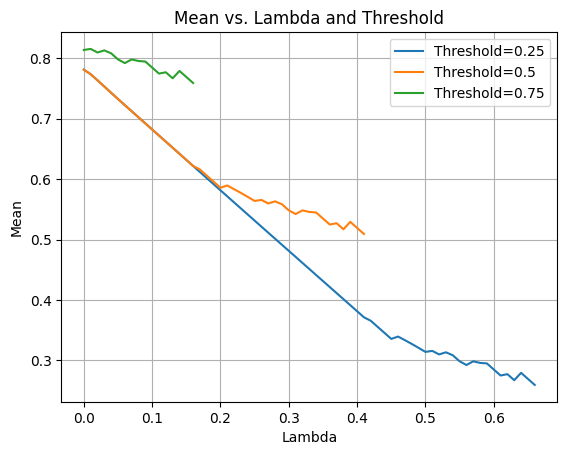

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from graph import draw_graph_in_map
import pandas as pd
import geopandas as gpd
from graph import draw_graph, Node, get_graph, get_edges_from_adjacency_matrix
from edge_discovery import euclidean_distance
from data import get_nodes
from shapely.geometry import Point

thresholds = [0.25, 0.5, 0.75]
alpha_vals = np.arange(0.0001, 1, 0.01)

# Plotting
for i, threshold in enumerate(thresholds):
    avgs = []
    for alpha_val in alpha_vals:
        W = glasso(df, alpha_val, threshold)
        all_weights = W.flatten()
        non_zero_weights = all_weights[all_weights != 0]
        avgs.append(np.mean(non_zero_weights))
    plt.plot(alpha_vals, avgs, label=f'Threshold={threshold}')
    
plt.xlabel('Lambda')
plt.ylabel('Mean')
plt.title('Mean vs. Lambda and Threshold')
plt.legend()
plt.grid(True)
plt.savefig('fig/avg_glasso.png')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from graph import draw_graph_in_map
import pandas as pd
import geopandas as gpd
from graph import draw_graph, Node, get_graph, get_edges_from_adjacency_matrix
from edge_discovery import euclidean_distance
from data import get_nodes
from shapely.geometry import Point

thresholds = [0.25, 0.5, 0.75]
alpha_vals = np.arange(0.0001, 1, 0.01)

# Plotting
for i, threshold in enumerate(thresholds):
    avgs = []
    for alpha_val in alpha_vals:
        W = glasso(df, alpha_val, threshold)
        all_weights = W.flatten()
        non_zero_weights = all_weights[all_weights != 0]
        avgs.append(np.mean(non_zero_weights))
    plt.plot(alpha_vals, avgs, label=f'Threshold={threshold}')
    
plt.xlabel('Alpha')
plt.ylabel('Mean')
plt.title('Mean vs. Alpha and Threshold')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
from graph import draw_graph_in_map
import pandas as pd
import geopandas as gpd
from graph import draw_graph, Node, get_graph, get_edges_from_adjacency_matrix
from edge_discovery import euclidean_distance
from data import get_nodes
from shapely.geometry import Point
df = pd.read_csv('Node-Location.csv',sep=';')
geometry = [Point(lon, lat) for lon, lat in zip(df['Lon'], df['Lat'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')
nodes, nodes_ids = get_nodes()

Index(['gracia', 'pr', 'eixample', 'prat', 'montcada', 'ciutadella', 'hebron',
       'badalona'],
      dtype='object')
[[1.         0.26604161 0.36927701 0.15323447 0.20313082 0.20212725
  0.26007514 0.1976823 ]
 [0.26604161 1.         0.22200072 0.22731959 0.26415449 0.18760754
  0.31971042 0.2282851 ]
 [0.36927701 0.22200072 1.         0.11866091 0.15350601 0.17369874
  0.20029557 0.15767501]
 [0.15323447 0.22731959 0.11866091 1.         0.33380507 0.15943808
  0.26423298 0.28018258]
 [0.20313082 0.26415449 0.15350601 0.33380507 1.         0.2128521
  0.31339686 0.33819274]
 [0.20212725 0.18760754 0.17369874 0.15943808 0.2128521  1.
  0.16048415 0.23676984]
 [0.26007514 0.31971042 0.20029557 0.26423298 0.31339686 0.16048415
  1.         0.27380973]
 [0.1976823  0.2282851  0.15767501 0.28018258 0.33819274 0.23676984
  0.27380973 1.        ]] [[ 1.26307444 -0.15222813 -0.36205043 -0.0207281  -0.06279791 -0.10821766
  -0.14700381 -0.0649298 ]
 [-0.15222813  1.2290307  -0.11243714 -0.1

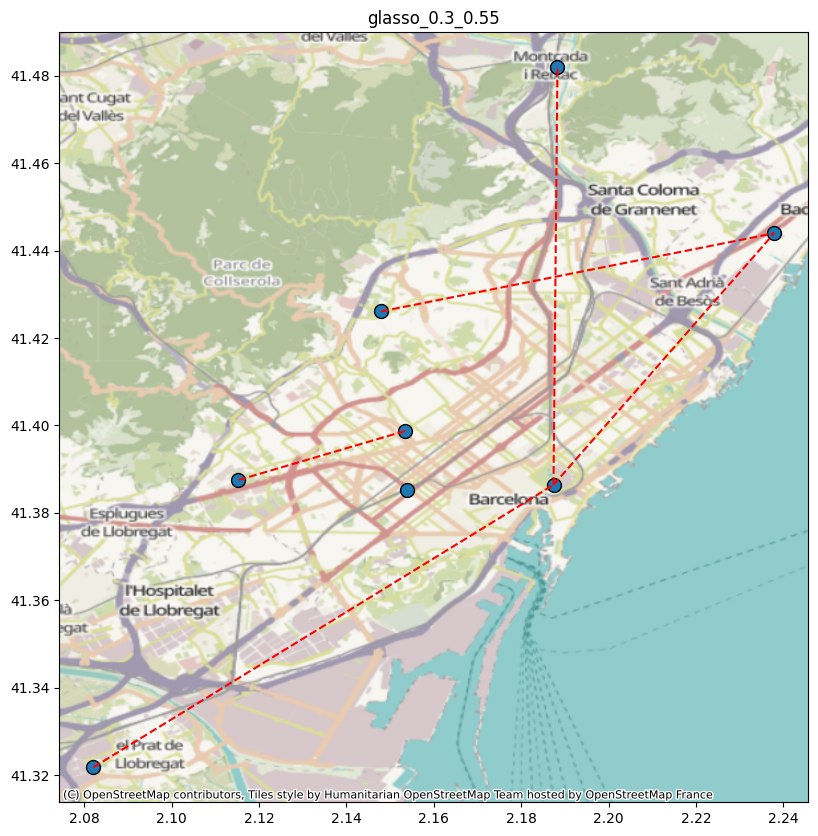

In [22]:
import numpy as np
threshold = 0.3
alpha = 0.55

df = get_scaled_data()
W = glasso(df, alpha, threshold)
print(W)
edges = get_edges_from_adjacency_matrix(W)

draw_graph_in_map(gdf, edges, f'glasso_{threshold}_{alpha}')